In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

In [2]:
def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _phi = inv_Q_sqrt.dot(v)
    return _lambda, _phi

In [3]:
X = np.genfromtxt("data_DMAP_PCA_vadere.txt", dtype='double')
print(f"Shape: {X.shape}")
print(f"Head:\n{X[:10]}")

Shape: (1000, 30)
Head:
[[ 7.6827459  16.59013494 13.48382465 16.51630336  4.09463337 12.94789591
   6.18520861 14.05182738  2.38475033 11.90640152  2.97632587  9.77760483
  14.60812295 17.09726857 14.83430839 18.04681822  9.43799959 16.67324233
   3.80880028  8.46192526  7.61803753 14.83000844  5.79351695  7.08561292
  13.16538662 18.27629557 10.98046407 17.09617936  5.90601637 15.32255011]
 [ 8.14553521 16.64840919 13.27720784 16.32854299  4.04456352 12.74760675
   6.03943416 14.42058457  2.1588189  11.83364991  2.99566259  9.57810206
  14.95613142 17.40936996 14.7963167  17.66234017  9.43866208 16.66898046
   4.16672983  8.39446831  7.30781961 14.95774938  5.54179469  7.21293348
  13.2091823  18.19522171 11.20285906 17.30546241  5.82218956 15.6793479 ]
 [ 7.88737011 16.50898935 13.48175464 16.02865748  3.81941289 13.02175097
   5.86548659 14.15677291  1.98708662 11.67543617  2.84128761  9.67313793
  14.55330811 16.60730233 15.14437067 18.0486582   8.99404244 16.38293638
   4.0359516

In [4]:
_lambda_2, _phi_2 = create_diffusion_map(X, 2)

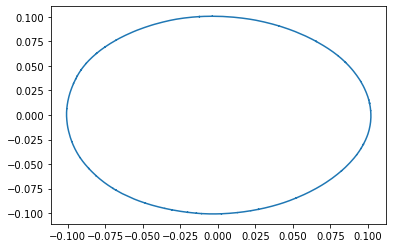

In [23]:
empty_array = np.zeros(1000)
for i in range(1000):
    empty_array[i] = i
plt.plot(_phi_2[:,0], _phi_2[:,1]);
plt.show()

In [6]:
_lambda_3, _phi_3 = create_diffusion_map(X, 3)

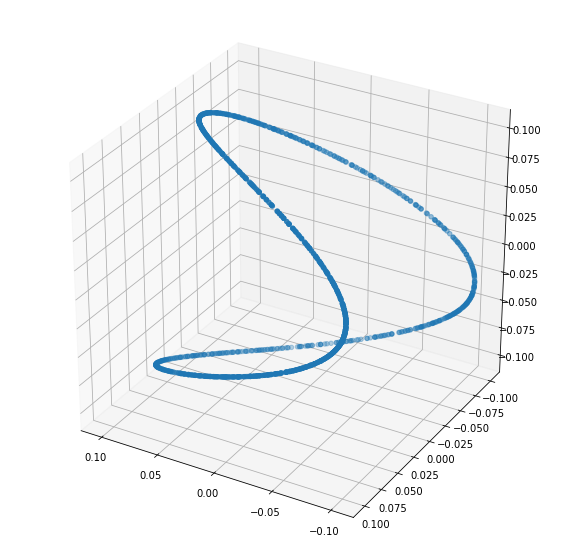

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(_phi_3[:, 0], _phi_3[:, 1], _phi_3[:, 2])
ax.view_init(30, 120)